# Electric Vehicle in Washington State

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

import pickle
# import missingno as msno

In [2]:
from IPython.display import display, HTML

def print_all(df): 
    with pd.option_context('display.max_rows',None):
        with pd.option_context('display.max_columns',None):
            with pd.option_context('display.float_format', '{:,.4f}'.format):
                with pd.option_context('display.float_format', '{:,.4f}'.format): # 셀 안의 내용 전체 출력
                    print(df.shape)
                    display(df)

def print_cols(df, n=5): 
    with pd.option_context('display.max_columns',None):
        with pd.option_context('display.float_format', '{:,.4f}'.format):
            print(df.shape)
            display(df[:n])

---
# Preliminary Analysis on EV and Election Data


In [685]:
import pickle

with open('data/ev_elec.pickle', 'rb') as f:
    ev_elec = pickle.load(f)

In [552]:
# party count
ev_elec['party_won_ld'].value_counts()

party_won_ld
Democratic    163985
Republican     41012
Name: count, dtype: int64

In [551]:
ev_elec['party_won_cnty'].value_counts()

party_won_cnty
Democratic    185571
Republican     19426
Name: count, dtype: int64

In [456]:
ev_elec['vin'].nunique()

12133

- vin vs. vehicle_id

## EV Registration by Legislative District

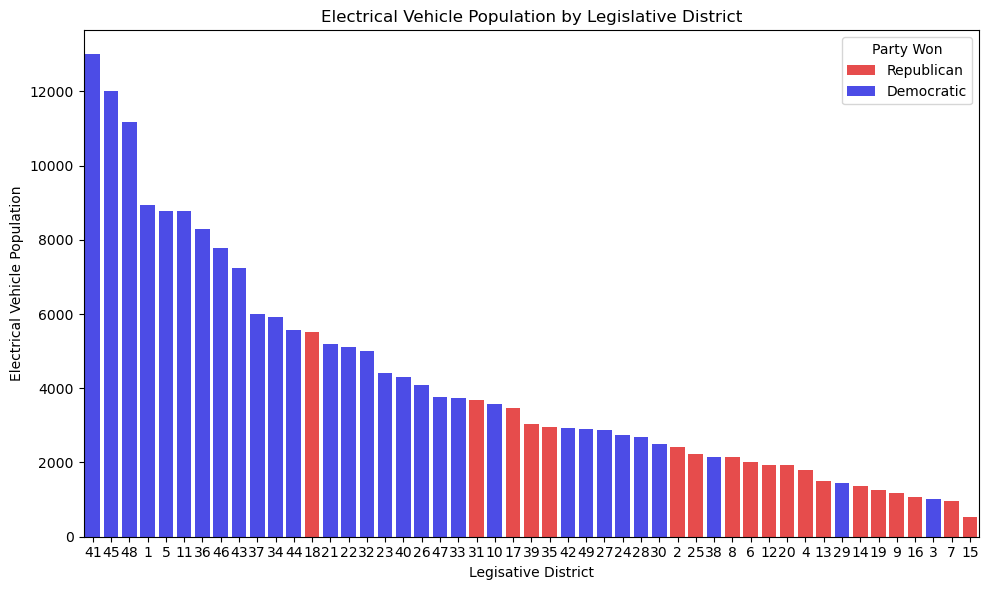

In [561]:
# plot for ev population per district
# political party color coded

us_political_party_colors = {
    'Democratic': {'hex':'#3333FF', 'rgb':(51, 51, 255)}, # light blue
    'Republican': {'hex':'#FF3333', 'rgb':(255, 51, 51)} # light red
}

democratic_color = us_political_party_colors['Democratic']['hex']
republican_color = us_political_party_colors['Republican']['hex']
party_colors = {'Democratic':democratic_color, 'Republican':republican_color}

plt.figure(figsize=(10,6))
sns.countplot(data=ev_elec, x='legislative_district', order=ev_elec['legislative_district'].value_counts().index, hue='party_won_ld', palette=colors)
plt.title('Electrical Vehicle Population by Legislative District')
plt.xlabel('Legisative District')
plt.ylabel('Electrical Vehicle Population')
plt.legend(title='Party Won')
plt.tight_layout()
plt.show();

## EV Registration by County

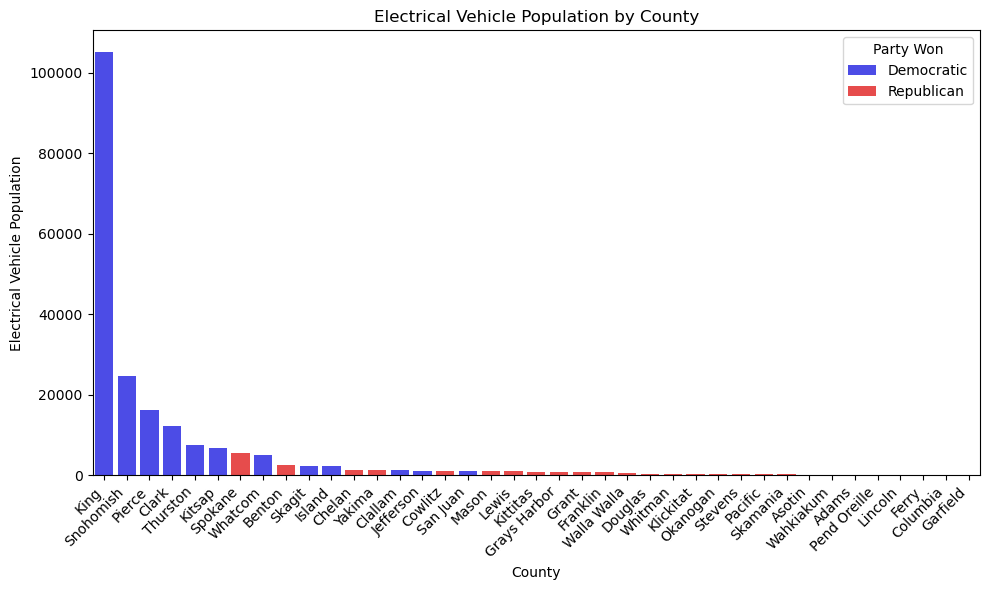

In [562]:
# plot for ev population per county
# political party color coded

plt.figure(figsize=(10,6))
# sns.barplot(elec_county_ev_added, x='county', y='ev_count', hue='party_won_cnty', palette=colors)
sns.countplot(data=ev_elec, x='county', order=ev_elec['county'].value_counts().index, hue='party_won_cnty', palette=colors)
plt.title('Electrical Vehicle Population by County')
plt.xlabel('County')
plt.ylabel('Electrical Vehicle Population')
plt.legend(title='Party Won')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show();

## EV Registration by Political Landscape

### Political Party Preference by Manufacturer

자동차 제조사별로 정당 선호도 분포를 시각화

각 전기차 제조사의 고객들이 어느 정당을 선호하는지 쉽게 비교하기 위함
- 예를 들어, Tesla 고객들의 정당 선호도와 다른 브랜드의 고객들의 선호도를 비교

1. countplot 대신 barplot을 사용하여 비율을 표시
2. 제조사별로 각 정당의 비율을 계산
3. 상위 10개 제조사만 표시 -> 가독성 증가 (필요에 따라 조정 가능)
4. 스택 바 차트를 사용하여 각 제조사별 정당 선호도 비율 비교
5. % 레이블 추가하여 정확한 값 확인
6. 추가 분석 정보를 통해 더 자세한 내용 확인

<Figure size 1200x600 with 0 Axes>

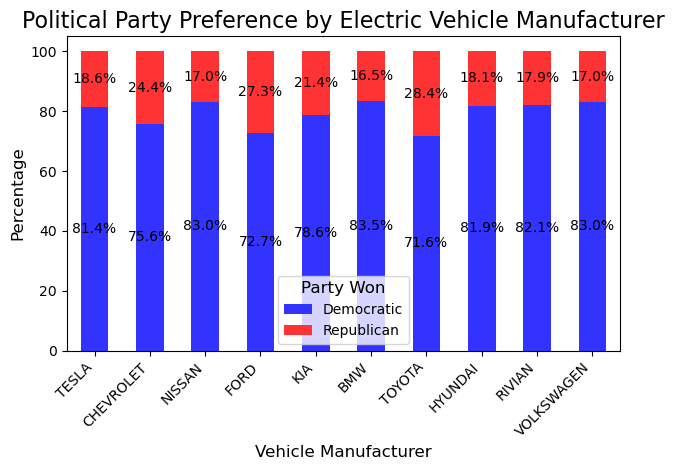


Total Vehicles by Manufacturer:
make
TESLA                   90099
CHEVROLET               15086
NISSAN                  14513
FORD                    10811
KIA                      9094
BMW                      8467
TOYOTA                   7920
HYUNDAI                  5773
RIVIAN                   5667
VOLKSWAGEN               5625
JEEP                     5396
VOLVO                    4866
AUDI                     3912
CHRYSLER                 3670
MERCEDES-BENZ            1928
SUBARU                   1238
PORSCHE                  1231
POLESTAR                 1160
HONDA                    1076
MITSUBISHI               1017
MINI                     1015
FIAT                      799
LEXUS                     754
CADILLAC                  743
MAZDA                     711
DODGE                     664
LINCOLN                   299
LUCID                     289
GENESIS                   265
SMART                     248
JAGUAR                    243
FISKER                    185
AL

In [460]:
# plot for ev population per car brand
# political party color coded

us_political_party_colors = {
    'Democratic': {'hex':'#3333FF', 'rgb':(51, 51, 255)}, # light blue
    'Republican': {'hex':'#FF3333', 'rgb':(255, 51, 51)} # light red
}

democratic_color = us_political_party_colors['Democratic']['hex']
republican_color = us_political_party_colors['Republican']['hex']
party_colors = {'Democratic':democratic_color, 'Republican':republican_color}

maker_party_counts = ev_elec.groupby(['make', 'party_won']).size().unstack(fill_value=0)
maker_party_percentages = maker_party_counts.div(maker_party_counts.sum(axis=1), axis=0) * 100

# 상위 10개 제조사만 선택 (선택사항)
top_10_makers = ev_elec['make'].value_counts().nlargest(10).index
maker_party_percentages = maker_party_percentages.loc[top_10_makers]

# 플롯 생성
plt.figure(figsize=(12, 6))
maker_party_percentages.plot(kind='bar', stacked=True, color=[us_political_party_colors['Democratic']['hex'], us_political_party_colors['Republican']['hex']])

plt.title('Political Party Preference by Electric Vehicle Manufacturer', fontsize=16)
plt.xlabel('Vehicle Manufacturer', fontsize=12)
plt.ylabel('Percentage', fontsize=12)
plt.legend(title='Party Won', title_fontsize='12', fontsize='10')
plt.xticks(rotation=45, ha='right')

# 퍼센티지 레이블 추가
for c in plt.gca().containers:
    plt.gca().bar_label(c, fmt='%.1f%%', label_type='center')

plt.tight_layout()
plt.show()

# 추가 분석: 제조사별 총 차량 수
total_vehicles = maker_party_counts.sum(axis=1).sort_values(ascending=False)
print("\nTotal Vehicles by Manufacturer:")
print(total_vehicles)

# 추가 분석: 제조사별 정당 선호도 비율
print("\nParty Preference Percentages by Manufacturer:")
print(maker_party_percentages)

### Political Party Preference Index by Manufacturer

단순한 비율만으로는 전체적인 맥락을 놓칠 수 있음; 전체 인구 대비 상대적인 선호도를 파악하기 위해 각 정당 지지자들의 총 수를 고려한 정규화된 지표 사용

'선호도 지수' 계산:
1. '선호도 지수' 계산; 각 정당의 전체 지지자 수를 고려하여 정규화된 값
2. 상위 10개 제조사에 대해 선호도 지수를 시각화
3. 각 제조사별 정당 간 선호도 차이 계산

선호도 지수 해석:
- 1.0은 평균적인 선호도
- 1.0보다 큰 값은 해당 정당 지지자들이 그 브랜드를 더 선호함을 의미
- 1.0보다 작은 값은 해당 정당 지지자들이 그 브랜드를 덜 선호함을 의미

목표:
- 어떤 브랜드가 특정 정당 지지자들에게 더 인기 있는지 파악
- 정당 간 가장 큰 선호도 차이를 보이는 브랜드를 식별
- 전체적인 시장 점유율과는 별개로, 정당별 상대적 선호도를 비교

예를 들어, 이 분석을 통해 "Republican 지지자들이 자신들의 전체 인구 대비 Tesla를 얼마나 더 (혹은 덜) 선호하는지"를 파악하는 등

참고로, 이 지수는 상대적인 선호도를 나타내며 절대적인 판매량이나 시장 점유율을 반영하지는 않음

<Figure size 1200x600 with 0 Axes>

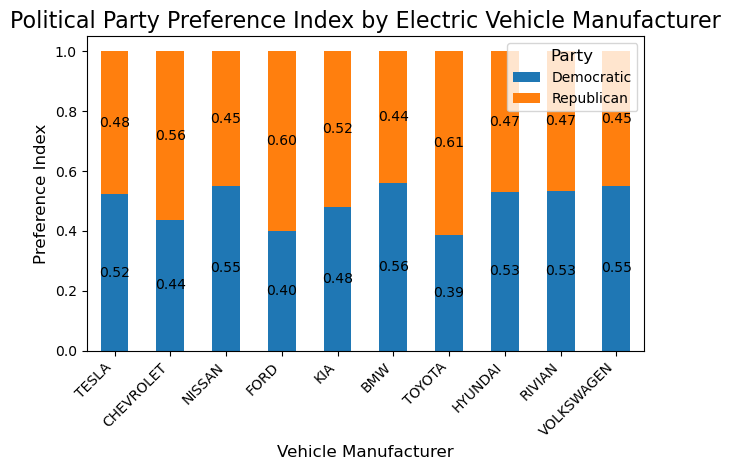

Preference Index (higher value indicates stronger preference):
party_won   Democratic  Republican
make                              
TESLA         0.521782    0.478218
CHEVROLET     0.437025    0.562975
NISSAN        0.549789    0.450211
FORD          0.399360    0.600640
KIA           0.479289    0.520711
BMW           0.559481    0.440519
TOYOTA        0.386889    0.613111
HYUNDAI       0.530273    0.469727
RIVIAN        0.533773    0.466227
VOLKSWAGEN    0.550154    0.449846

Brands with the largest preference difference between parties:
make
TOYOTA        0.226223
FORD          0.201279
CHEVROLET     0.125950
BMW           0.118962
VOLKSWAGEN    0.100308
NISSAN        0.099579
RIVIAN        0.067546
HYUNDAI       0.060546
TESLA         0.043565
KIA           0.041422
dtype: float64


In [461]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def calculate_preference_index(df, brand_col, party_col):
    # 전체 정당별 수 계산
    total_party_counts = df[party_col].value_counts()
    
    # 브랜드별, 정당별 수 계산
    brand_party_counts = df.groupby([brand_col, party_col]).size().unstack(fill_value=0)
    
    # 선호도 지수 계산
    preference_index = brand_party_counts.div(total_party_counts, axis=1)
    preference_index = preference_index.div(preference_index.sum(axis=1), axis=0)
    
    return preference_index

# 선호도 지수 계산
preference_index = calculate_preference_index(ev_elec, 'make', 'party_won')

# 상위 10개 제조사 선택
top_10_makers = ev_elec['make'].value_counts().nlargest(10).index
preference_index = preference_index.loc[top_10_makers]

# 시각화
plt.figure(figsize=(12, 6))
preference_index.plot(kind='bar', stacked=True)

plt.title('Political Party Preference Index by Electric Vehicle Manufacturer', fontsize=16)
plt.xlabel('Vehicle Manufacturer', fontsize=12)
plt.ylabel('Preference Index', fontsize=12)
plt.legend(title='Party', title_fontsize='12', fontsize='10')
plt.xticks(rotation=45, ha='right')

# 선호도 지수 레이블 추가
for c in plt.gca().containers:
    plt.gca().bar_label(c, fmt='%.2f', label_type='center')

plt.tight_layout()
plt.show()

# 결과 출력
print("Preference Index (higher value indicates stronger preference):")
print(preference_index)

# 추가 분석: 가장 큰 차이를 보이는 브랜드
preference_diff = (preference_index['Republican'] - preference_index['Democratic']).abs().sort_values(ascending=False)
print("\nBrands with the largest preference difference between parties:")
print(preference_diff)

### Brand Preference within Each Party

각 정당 내에서 브랜드별 선호도를 파악하는 것은 또 다른 중요한 관점을 제공할 수 있음

이를 위해 각 정당별로 브랜드 선호도를 계산하고 시각화:
1) 각 정당 내에서 브랜드별 선호도 비율을 계산
2) 전체 데이터에서 상위 10개 브랜드를 선택하여 분석
3) Democratic Party와 Republican Party 각각에 대해 브랜드 선호도를 별도의 그래프로 시각화
4) 각 정당에서 가장 선호되는 브랜드와 정당 간 선호도 차이가 가장 큰 브랜드를 식별

목적:
- 각 정당 지지자들이 가장 선호하는 전기차 브랜드를 확인
- Democratic Party와 Republican Party 지지자들 사이의 브랜드 선호도 차이를 비교
- 특정 브랜드가 어느 정당에서 더 인기 있는지 파악

참고:
- 각 정당 내에서의 상대적인 선호도를 보여주며, 전체 시장에서의 점유율과는 다를 수 있음
- 지역적 요인, 소득 수준, 충전 인프라 등 다른 변수들도 브랜드 선호도에 영향을 줄 수 있으므로, 이러한 요소들도 고려 필요

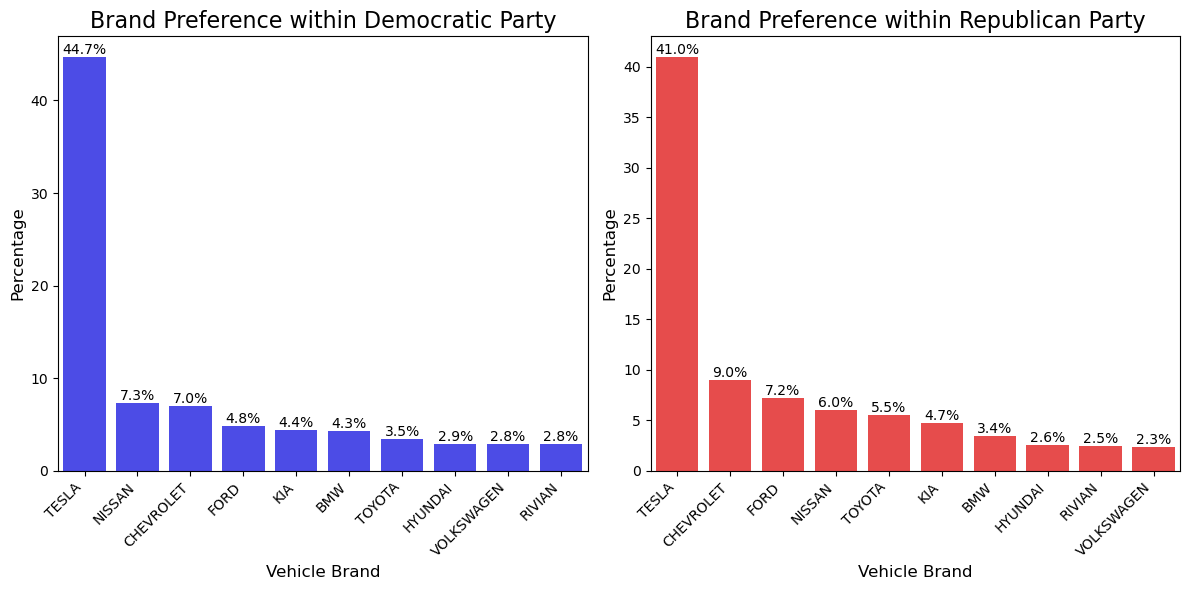

Brand Preference Percentages within Each Party:
make            TESLA  CHEVROLET    NISSAN      FORD       KIA       BMW  \
party_won                                                                  
Democratic  44.697991   6.957953  7.345794  4.790682  4.360765  4.313809   
Republican  40.966059   8.963230  6.015313  7.205208  4.737638  3.396567   

make          TOYOTA   HYUNDAI    RIVIAN  VOLKSWAGEN  
party_won                                             
Democratic  3.458853  2.881971  2.836235    2.847821  
Republican  5.481323  2.552911  2.477324    2.328587  

Most Preferred Brands in Each Party:
make
TESLA         Democratic
CHEVROLET     Republican
NISSAN        Democratic
FORD          Republican
KIA           Republican
BMW           Democratic
TOYOTA        Republican
HYUNDAI       Democratic
RIVIAN        Democratic
VOLKSWAGEN    Democratic
dtype: object

Brands with the Largest Preference Difference Between Parties:
make
TESLA         3.731932
FORD          2.414526
TOYOT

In [472]:

def calculate_party_internal_preference(df, brand_col, party_col):
    # 정당별, 브랜드별 수 계산
    party_brand_counts = df.groupby([party_col, brand_col]).size().unstack(fill_value=0)
    
    # 각 정당 내에서의 브랜드 비율 계산
    party_brand_percentages = party_brand_counts.div(party_brand_counts.sum(axis=1), axis=0) * 100
    
    return party_brand_percentages

# 정당 내부 선호도 계산
party_internal_preference = calculate_party_internal_preference(ev_elec, 'make', 'party_won')

# 상위 10개 브랜드 선택 (전체 데이터에서)
top_10_brands = ev_elec['make'].value_counts().nlargest(10).index
party_internal_preference = party_internal_preference[top_10_brands]

# 시각화
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Democratic Party
democratic_prefs = party_internal_preference.loc['Democratic'].sort_values(ascending=False)
sns.barplot(x=democratic_prefs.index, y=democratic_prefs.values, ax=ax1, color='#3333FF')
ax1.set_title('Brand Preference within Democratic Party', fontsize=16)
ax1.set_xlabel('Vehicle Brand', fontsize=12)
ax1.set_ylabel('Percentage', fontsize=12)
# x축 레이블 45도 회전 및 오른쪽 정렬
plt.setp(ax1.get_xticklabels(), rotation=45, ha='right') # plt.setp()를 사용하여 x축 레이블의 속성을 설정; 
                                                         # Seaborn은 자동으로 틱을 설정하기 때문에, 이는 Seaborn이 설정한 틱과 충돌하지 않으면서도 원하는 회전과 정렬을 적용할 수 있게 함
for i, v in enumerate(democratic_prefs.values):
    ax1.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

# Republican Party
republican_prefs = party_internal_preference.loc['Republican'].sort_values(ascending=False)
sns.barplot(x=republican_prefs.index, y=republican_prefs.values, ax=ax2, color='#FF3333')
ax2.set_title('Brand Preference within Republican Party', fontsize=16)
ax2.set_xlabel('Vehicle Brand', fontsize=12)
ax2.set_ylabel('Percentage', fontsize=12)
plt.setp(ax2.get_xticklabels(), rotation=45, ha='right')
for i, v in enumerate(republican_prefs.values):
    ax2.text(i, v, f'{v:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

# 결과 출력
print("Brand Preference Percentages within Each Party:")
print(party_internal_preference)

# 추가 분석: 각 정당에서 가장 선호되는 브랜드
print("\nMost Preferred Brands in Each Party:")
print(party_internal_preference.idxmax())

# 추가 분석: 정당 간 선호도 차이가 가장 큰 브랜드
preference_diff = (party_internal_preference.loc['Democratic'] - party_internal_preference.loc['Republican']).abs().sort_values(ascending=False)
print("\nBrands with the Largest Preference Difference Between Parties:")
print(preference_diff)

# Charging Station/Infrastructure

In [662]:
import pickle

with open('data/charger.pickle', 'rb') as f:
    charger = pickle.load(f)

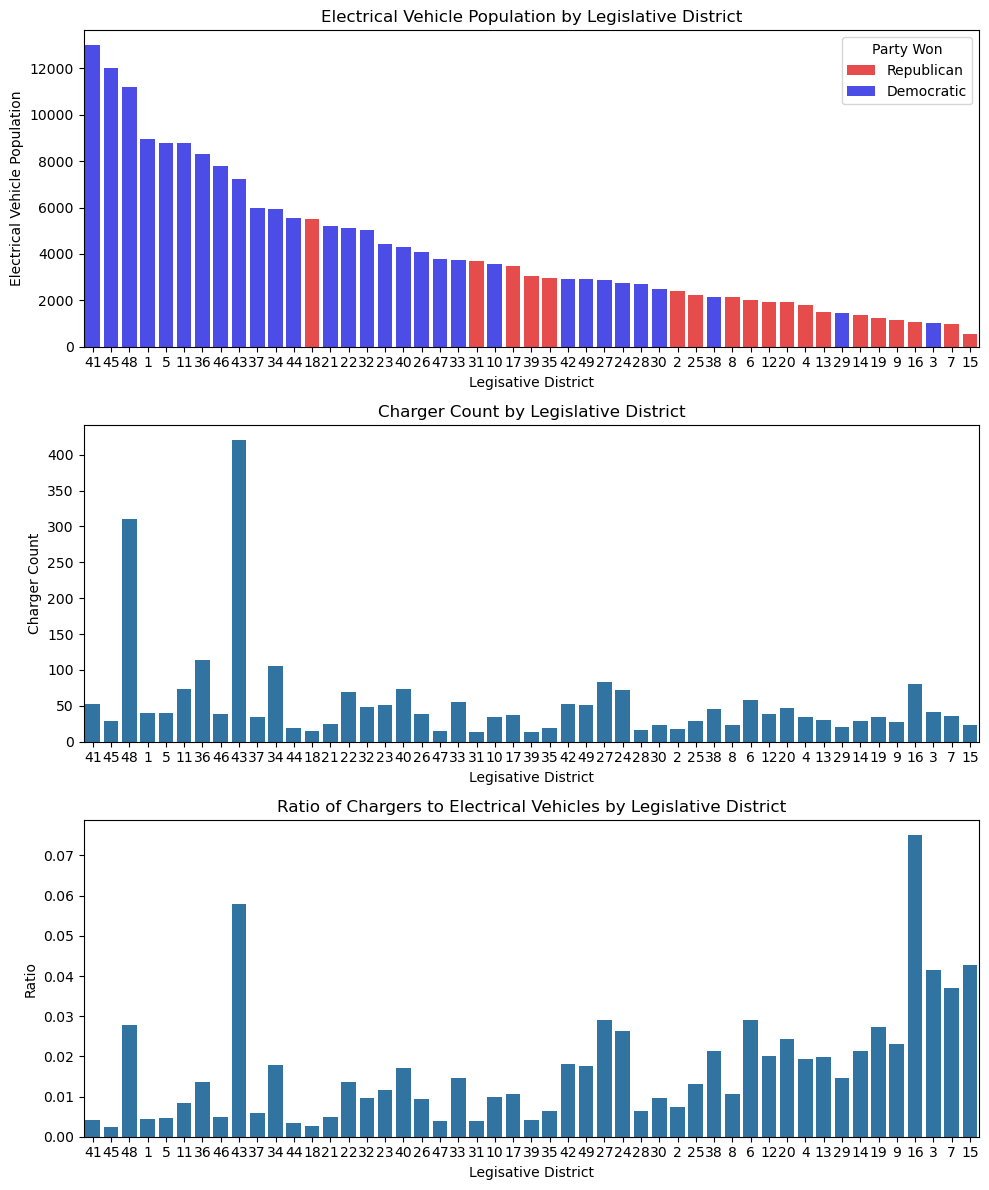

In [681]:
# electric vehicle and charging station

order = ev_elec['legislative_district'].value_counts().index

fig, axs = plt.subplots(3, figsize=(10, 12))

# plot 1: electric vehicle by ld
sns.countplot(data=ev_elec, x='legislative_district', 
              order=order, 
              hue='party_won_ld', palette=party_colors, ax=axs[0])
axs[0].set_title('Electrical Vehicle Population by Legislative District')
axs[0].set_xlabel('Legisative District')
axs[0].set_ylabel('Electrical Vehicle Population')
axs[0].legend(title='Party Won')

# plot 2: electric charging station by ld
sns.countplot(data=charger, x='legislative_district_upper', 
              order=order, 
              ax=axs[1])
axs[1].set_title('Charger Count by Legislative District')
axs[1].set_xlabel('Legisative District')
axs[1].set_ylabel('Charger Count')

# plot 3: EVs to fuel station ratio by ld
ev_count = ev_elec['legislative_district'].value_counts()
charger_count = charger['legislative_district_upper'].value_counts()
ratio = charger_count / ev_count
sns.barplot(x=ratio.index, y=ratio.values, order=order, ax=axs[2])
axs[2].set_title('Ratio of Chargers to Electrical Vehicles by Legislative District')
axs[2].set_xlabel('Legisative District')
axs[2].set_ylabel('Ratio')

plt.tight_layout()
plt.show()

# Next

차트:
```
EVs per model year

Contigence table between col a (like model year) vs. col b (like battery last)
- crosstab

Figuring Out The Most And Least Sold Company In Washington State
- bar plot per car maker
- plot = (100 * ev_preprocess['Make'].value_counts()[:20] / len(ev_preprocess['Make'])).plot(
kind='bar', color='red', title='EVs per Fabricant (%)')

Distribution of car brands across Washington state
- boxplot per car maker

EVs per model
- plot = (100 * ev_preprocess['Model'].value_counts()[:10] / len(ev_preprocess['Model'])).plot(
kind='pie', autopct='%1.1f%%', title='Evs per Model (%)')

Evs per type
- plot = (100 * ev_preprocess['Electric Vehicle Type'].value_counts()[:10] / len(ev_preprocess['Electric Vehicle Type'])).plot(
kind='barh', color=['blue', 'cyan'], title='Evs per Type in the US (%)')

Evs per Battery Type and CAFV in the last 20 years
- battery_year = sns.catplot(
    x="Electric Vehicle Type", 
    y="Model Year",
    palette={'Not eligible due to low battery range':'red', 'Clean Alternative Fuel Vehicle Eligible':'green', 'Eligibility unknown as battery range has not been researched':'yellow'},
    hue="Clean Alternative Fuel Vehicle (CAFV) Eligibility",
    data=ev_preprocess)
battery_year.set_xticklabels(labels=['BEV', 'PHEV'], rotation=45)

지역별 전기세
지역별 경제력
```